### Diamond Price Predictor

#### Introduction About the Data :


**The dataset** The goal is to predict price of given diamond (Regression Analysis).
There are 10 independent variables (including id):
- <font color='red'>id</font>: unique identifier of each diamond
- <font color='red'>carat</font>: Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- <font color='red'>cut</font>: Quality of Diamond Cut
- <font color='red'>color</font>: Color of Diamond
- <font color='red'>clarity</font>: Diamond clarity is a measure of the purity and rarity of the stone, graded by the these characteristics under 10-power magnification.
- <font color='red'>depth</font> : The depth of diamond is its height (in millimeters) measured from the culet(bottom tip) to the table(flat,top surface)
- <font color='red'>table</font>: A diamond's table is the facet which can be seen when the stone is viewed face up.
- <font color='red'>x</font>: Diamond X dimension
- <font color='red'>y</font>: Diamond Y dimension
- <font color='red'>z</font>: Diamond Z dimension

**Target Variable**: Price of the given diamond


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
##Data Ingestion Steps
df= pd.read_csv('data/gemstone.csv',index_col='id')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [4]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [5]:
##Checking for the missing Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing Values found

In [6]:
##Checking for the duplicates
df.duplicated().sum()

0

No Duplicates Found

In [7]:
# Segregate Numerical and Categorical Data
numerical_data=df.columns[df.dtypes!='object']
categorical_data=df.columns[df.dtypes=='object']
numerical_data,categorical_data

(Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [8]:
df[categorical_data].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [9]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [10]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [11]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [12]:
## Encoding Categorical Values
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

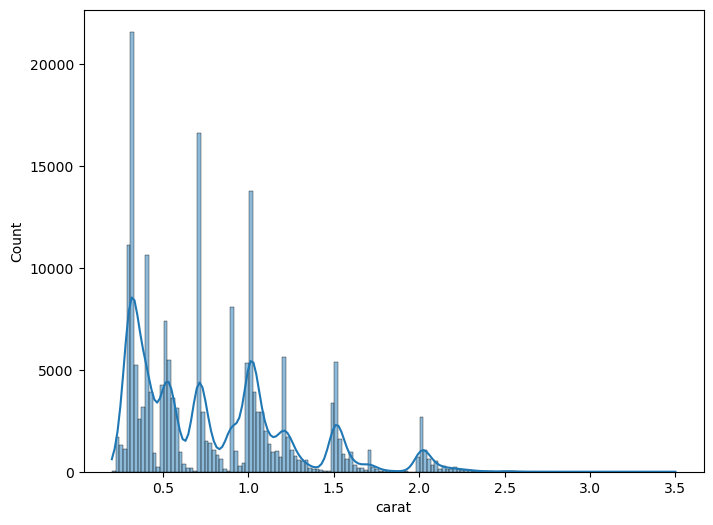

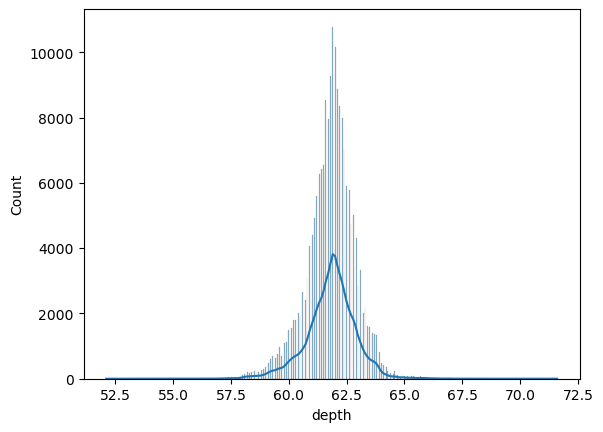

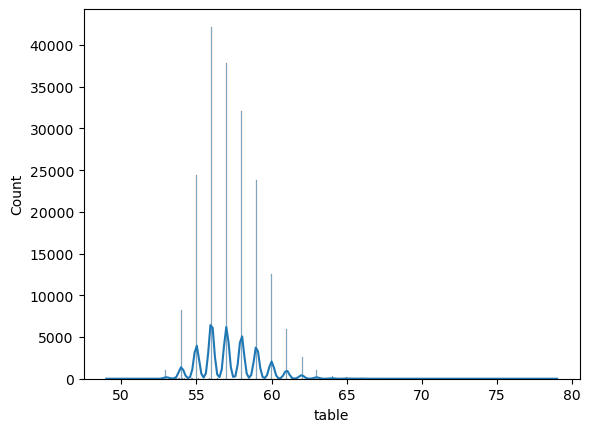

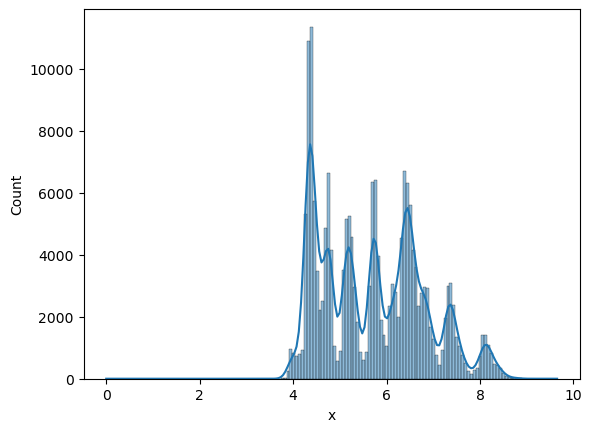

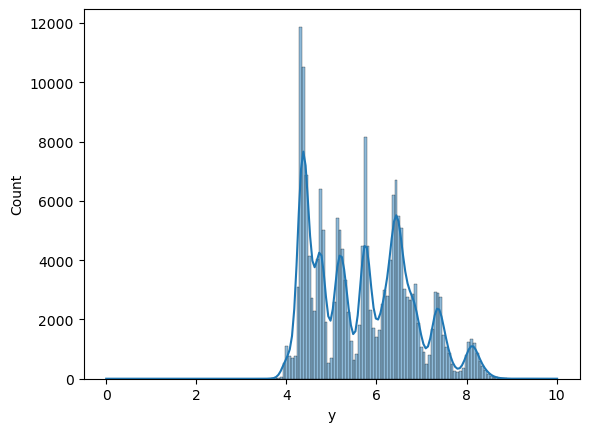

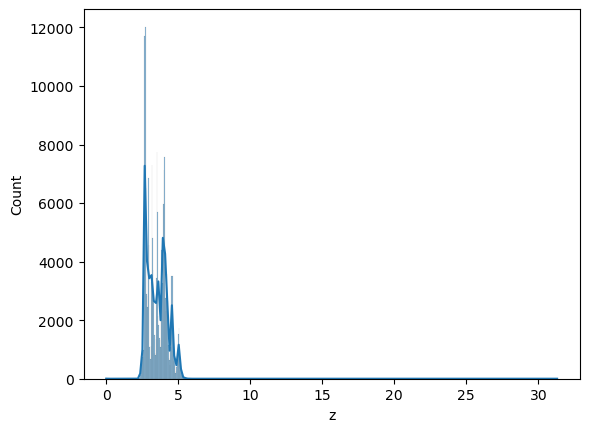

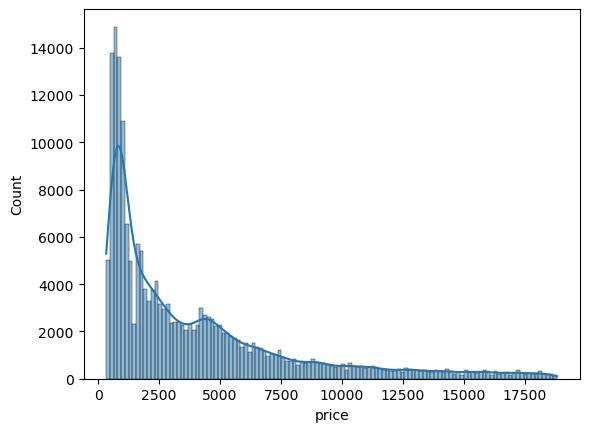

In [13]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_data:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

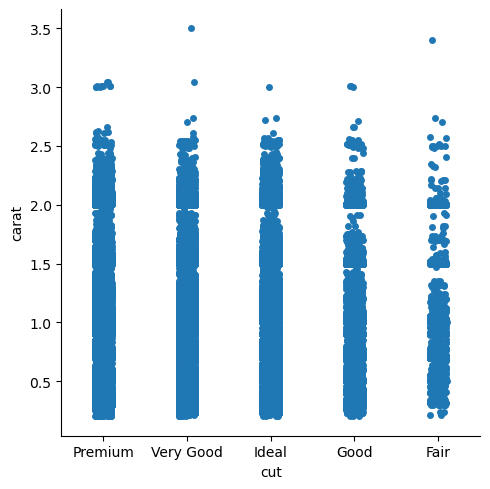

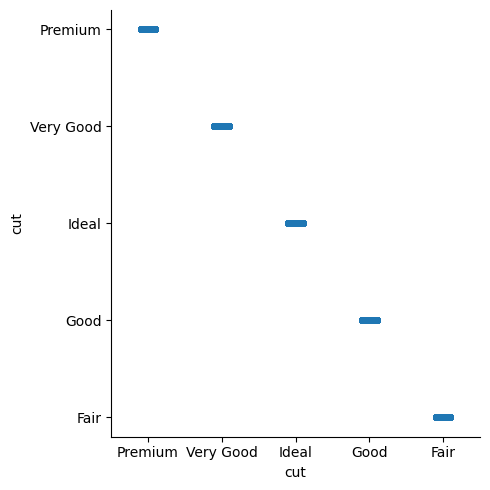

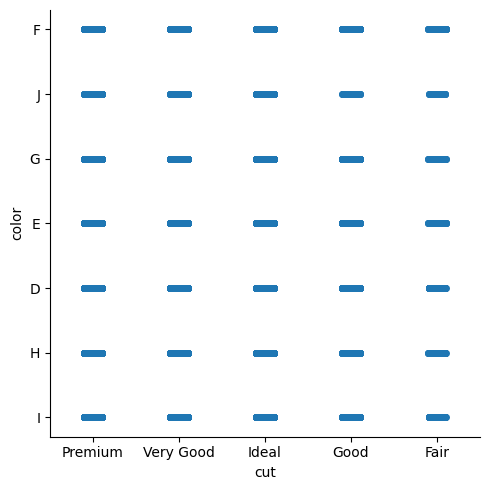

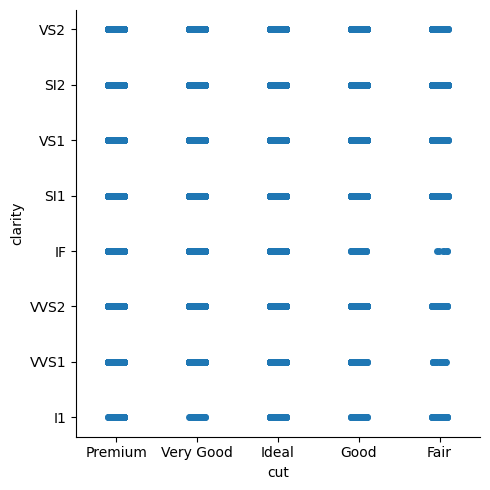

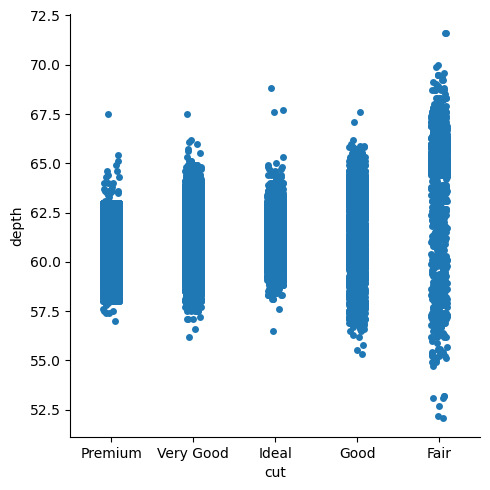

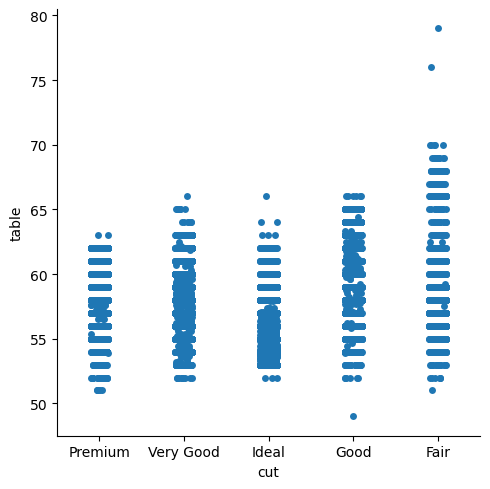

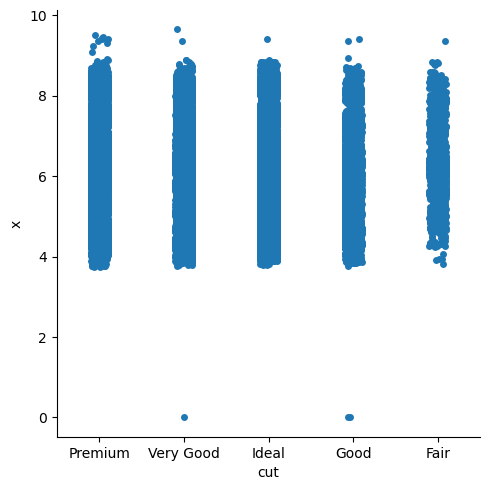

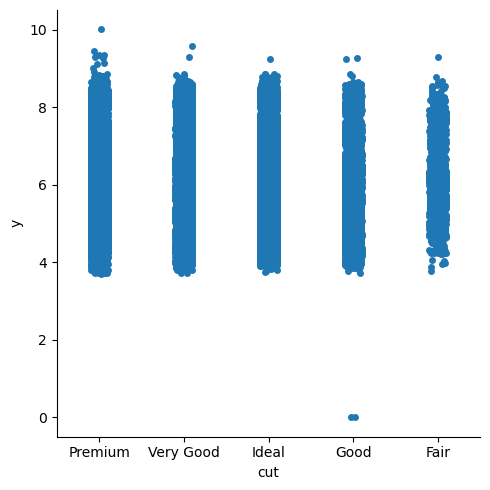

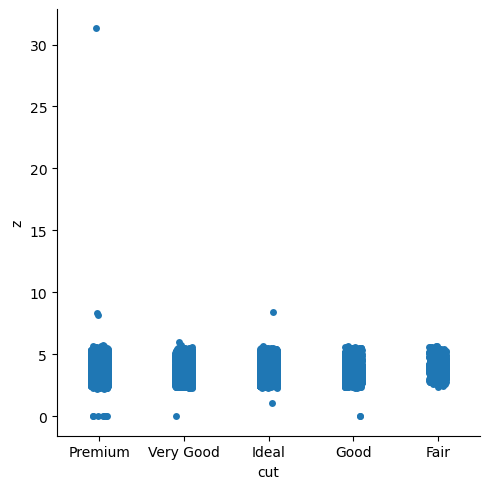

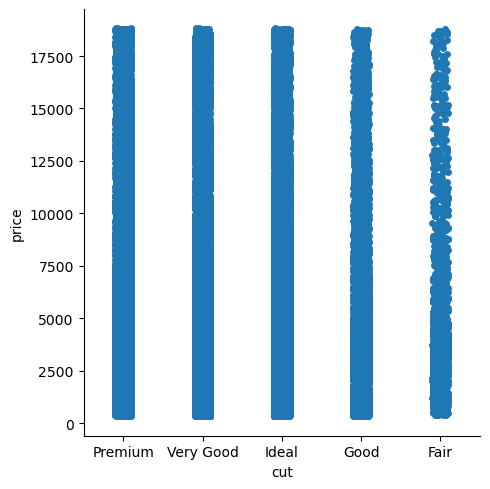

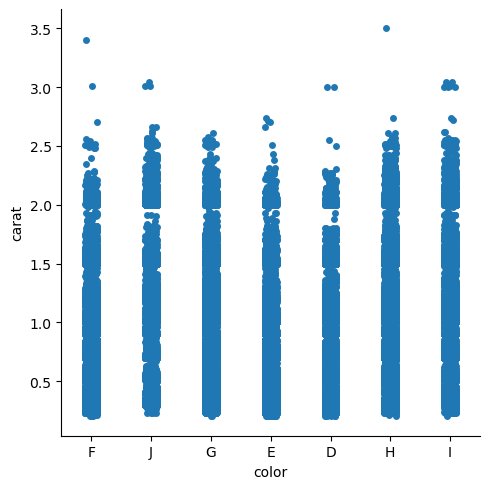

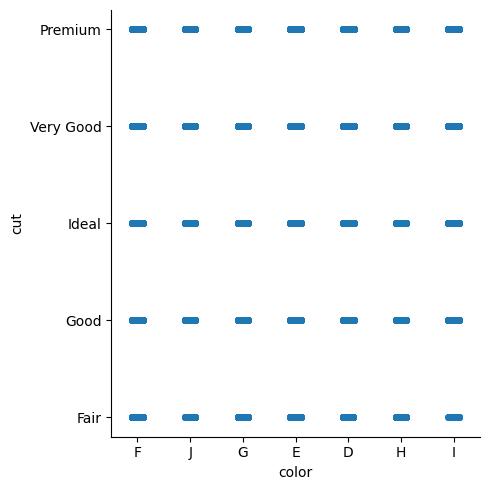

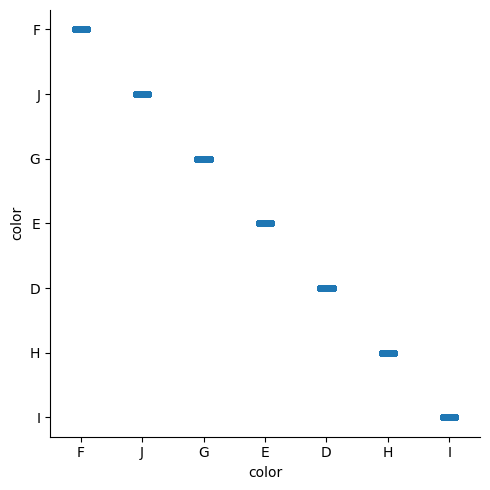

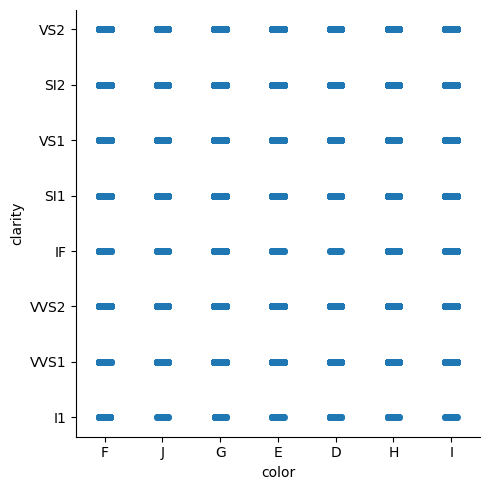

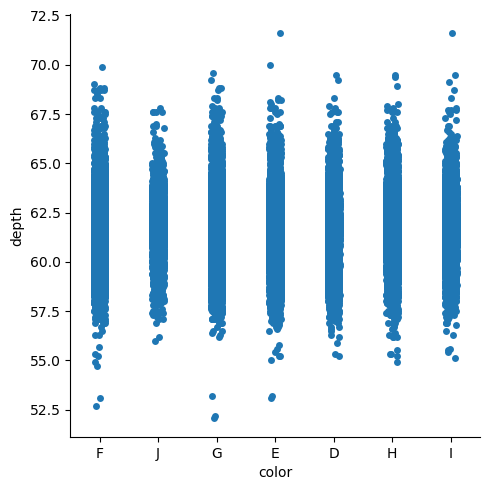

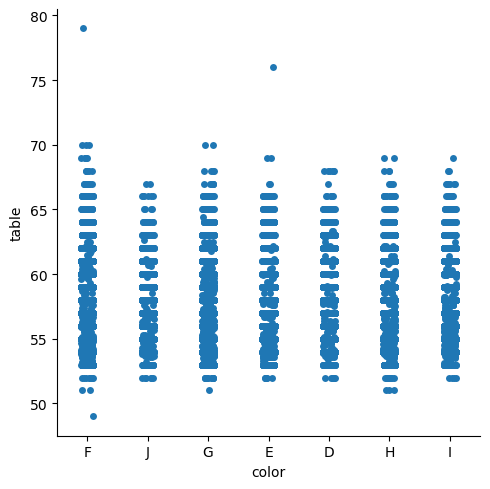

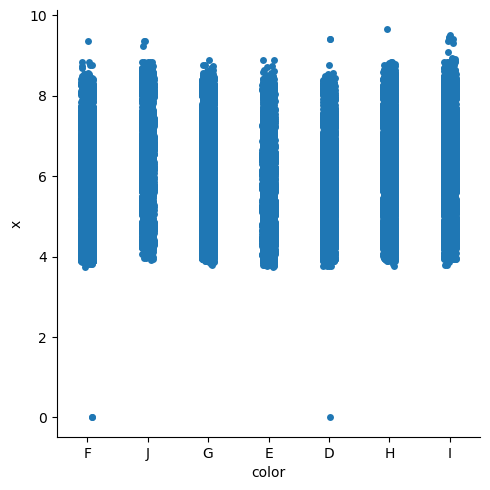

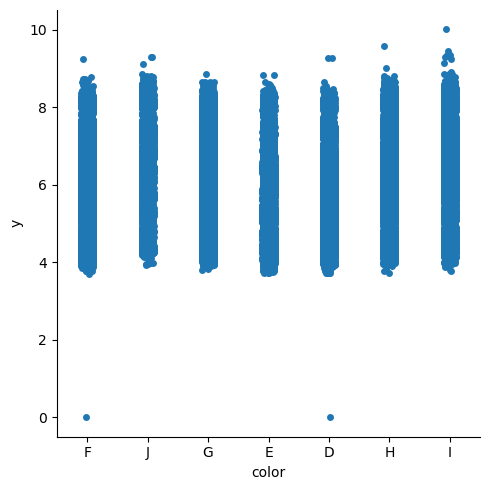

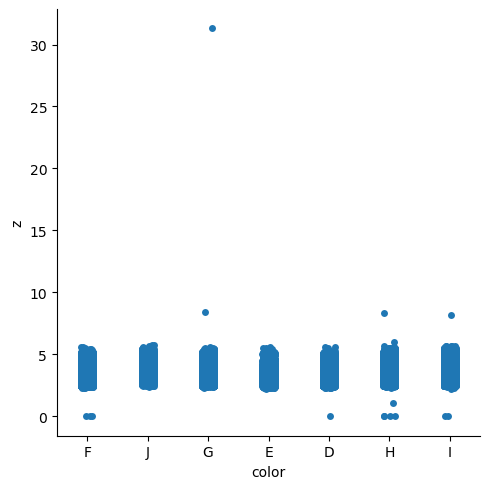

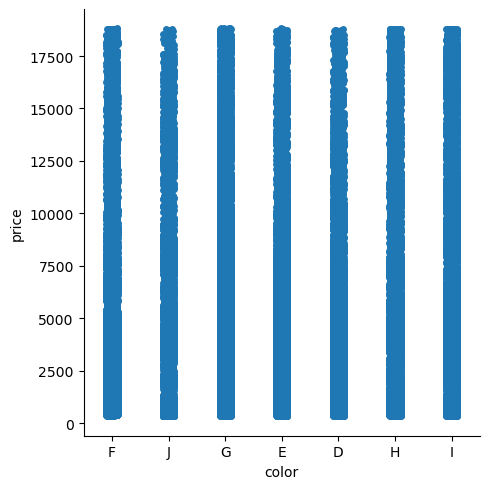

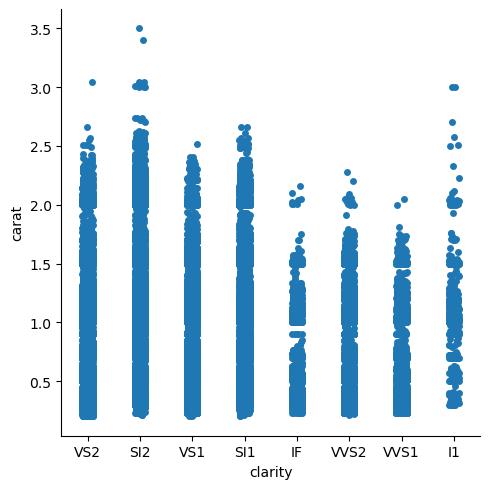

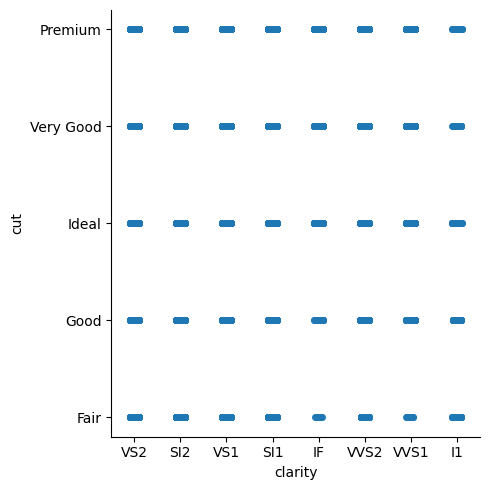

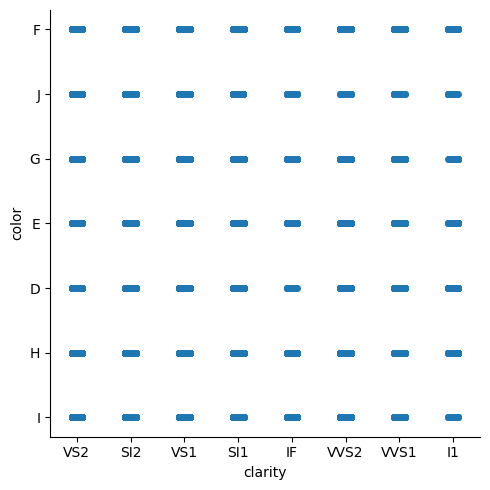

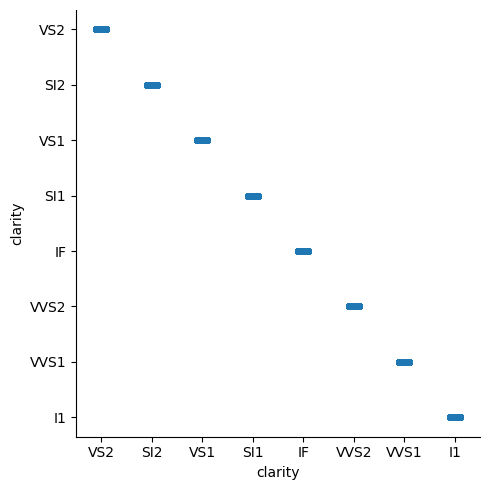

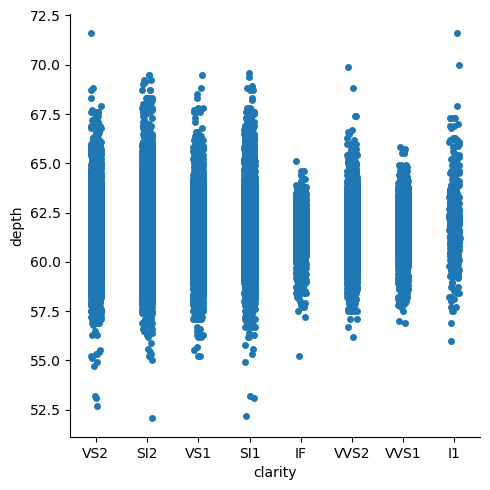

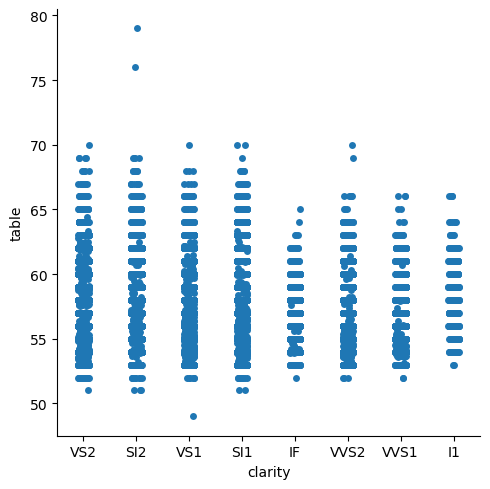

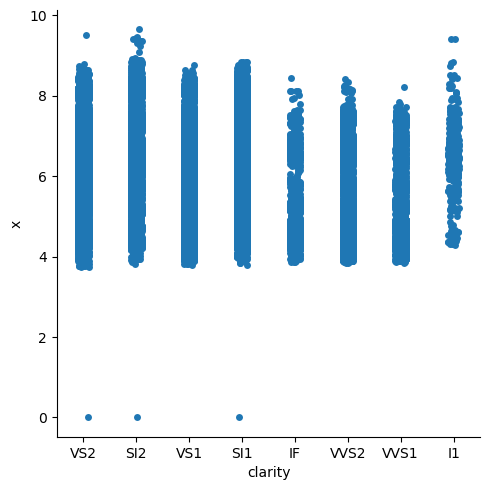

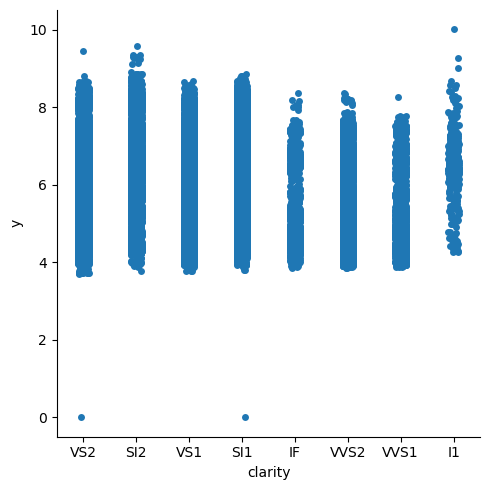

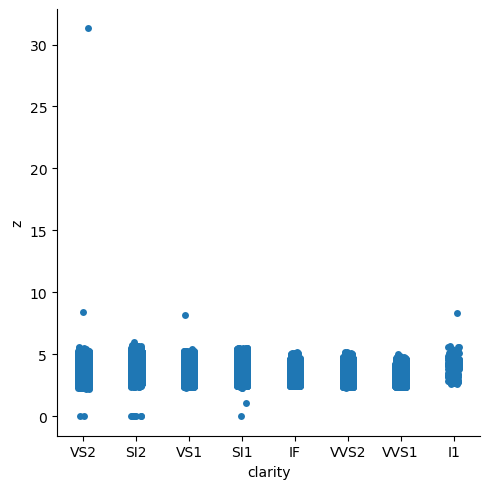

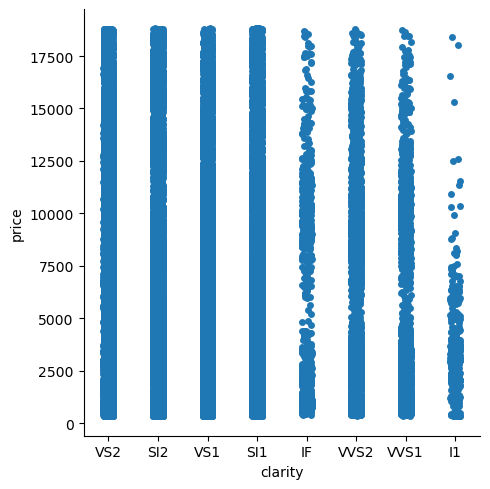

In [14]:
#For Categorical Feature
plt.figure(figsize=(8,6))
x=0
for i in categorical_data:
    for j in df.columns:
        sns.catplot(data=df,x=i,y=j)
        plt.show()

<Axes: >

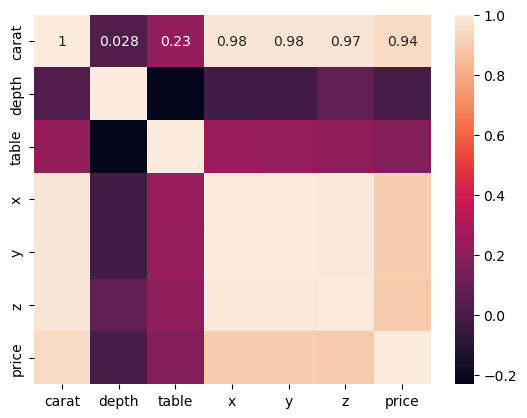

In [15]:
sns.heatmap(df[numerical_data].corr(),annot=True)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [17]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

For Domain Knowledge refer to: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

In [18]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [21]:
clarity_map={'VS2':5, 'SI2':7, 'VS1':4, 'SI1':6, 'IF':1, 'VVS2':3, 'VVS1':2, 'I1':8}

In [22]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [23]:
color_map={'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [24]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,4,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,3,7,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,5,62.6,59.0,7.65,7.61,4.77,14453
